In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load images
perspective_image = cv2.imread('./assets/world_cup_2006.png')
# perspective_image_canny = cv2.Canny(perspective_image, 50, 100)
perspective_image.shape


(720, 1280, 3)

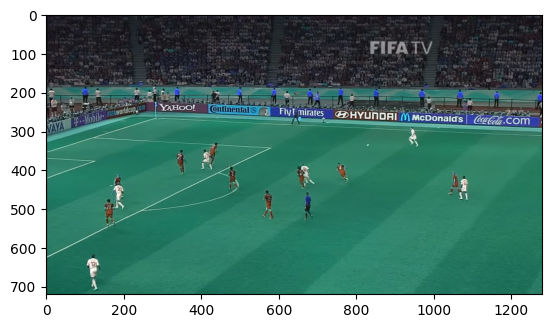

In [3]:
plt.imshow(perspective_image)
plt.axis('on')
plt.show()

In [4]:
template_image = cv2.imread('./assets/world_cup_template.png')
# template_image_canny = cv2.Canny(template_image, 50, 100)
template_image.shape

(680, 1050, 3)

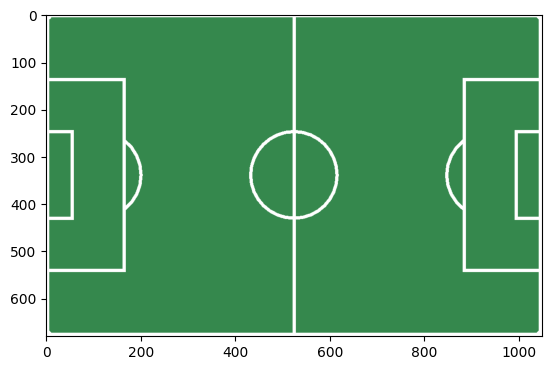

In [5]:
plt.imshow(template_image)
plt.axis('on')
plt.show()

In [6]:
# Points in the perspective image
points_perspective = np.array([
    [124, 378],  # Example point
    [125, 317],   # Example point
    [578, 348],  # Example point
    [248, 504]   # Example point
], dtype='float32')

# Corresponding points in the template image
points_template = np.array([
    [54, 248],    # Corresponding point
    [3, 138],   # Corresponding point
    [165, 138],  # Corresponding point
    [165, 411]    # Corresponding point
], dtype='float32')

In [7]:
# Compute homography matrix
H, status = cv2.findHomography(points_template, points_perspective)

print(H)

[[ 2.46826153e+00 -1.24449072e+00  2.77337614e+02]
 [ 1.37077766e-01  1.57630493e-01  2.64410552e+02]
 [-1.03201117e-04 -6.93253386e-04  1.00000000e+00]]


In [8]:
# Warp the template image
# height, width = perspective_image_canny.shape
height, width, channels = perspective_image.shape
warped_image = cv2.warpPerspective(template_image, H, (width, height))
# warped_image = cv2.warpPerspective(template_image_canny, H, (width, height))

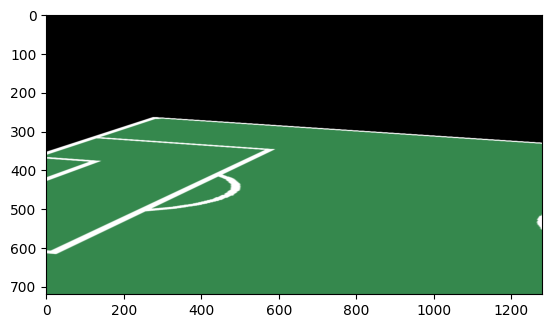

True

In [9]:
plt.imshow(warped_image)
plt.axis('on')
plt.show()
cv2.imwrite('./assets/warped_image.png', warped_image)

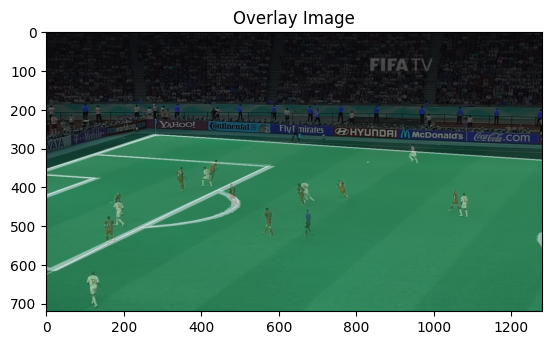

In [10]:
# Show the result overlay
out = (warped_image * 0.5 + perspective_image * 0.5).astype(np.uint8)
# out = (warped_image * 0.5 + perspective_image_canny * 0.5).astype(np.uint8)
plt.figure("Overlay Image")
plt.imshow(out, cmap='gray')
plt.title('Overlay Image')

plt.show()

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Load the image
image_path = './assets/warped_image.png'
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detector
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Use Hough Line Transform to detect lines
lines = cv2.HoughLines(edges, 1, np.pi / 180, 140)

print(lines)


[[[555.          1.134464 ]]

 [[243.          1.6406095]]

 [[305.          1.6406095]]

 [[309.          1.6406095]]

 [[344.          1.2566371]]

 [[569.          1.134464 ]]

 [[254.          1.6231562]]

 [[257.          1.6231562]]

 [[567.          1.1170107]]

 [[260.          1.6231562]]

 [[337.          1.2566371]]

 [[570.          1.1170107]]]


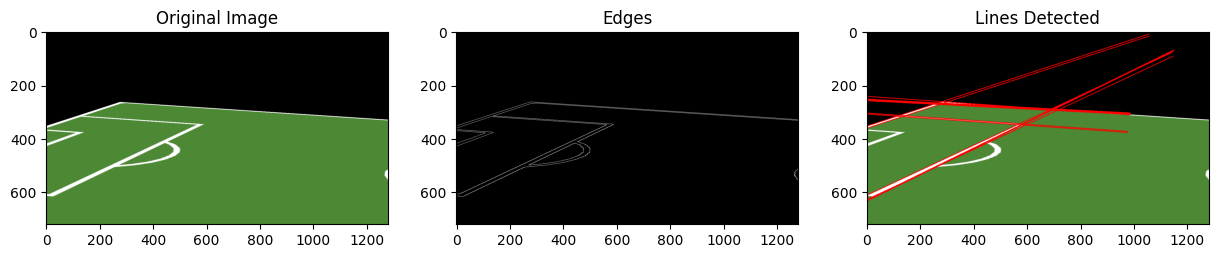

In [21]:

# Create a copy of the original image to draw lines
line_image = np.copy(image)
# line_image = np.zeros_like(image)

# Draw lines on the image in red color
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Red color

# Display the original image, edges, and the image with lines
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title('Edges')
plt.imshow(edges, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Lines Detected')
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))

plt.show()


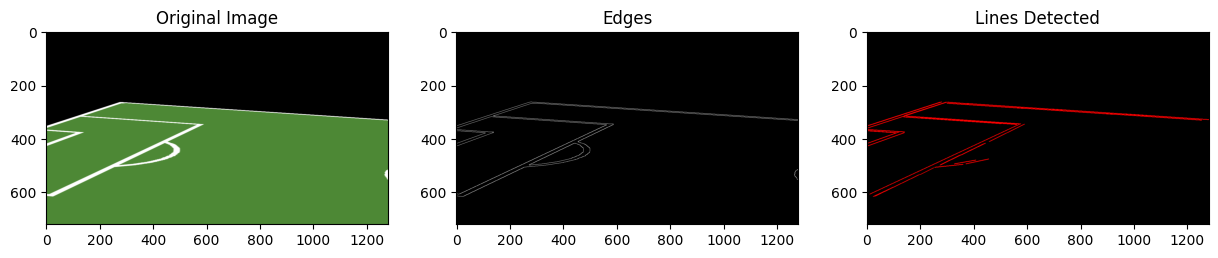

True

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = './assets/warped_image.png'
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detector with adjusted parameters
edges = cv2.Canny(blurred, 50, 150, apertureSize=3)

# Use Probabilistic Hough Line Transform to detect lines
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=50, maxLineGap=10)

# Create a copy of the original image to draw lines
# line_image = np.copy(image)
line_image = np.zeros_like(image)

# Draw lines on the image in red color
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Red color

# Display the original image, edges, and the image with lines
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title('Edges')
plt.imshow(edges, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Lines Detected')
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))

plt.show()


# Saving the Line Image
cv2.imwrite('lines_of_template.png', line_image)

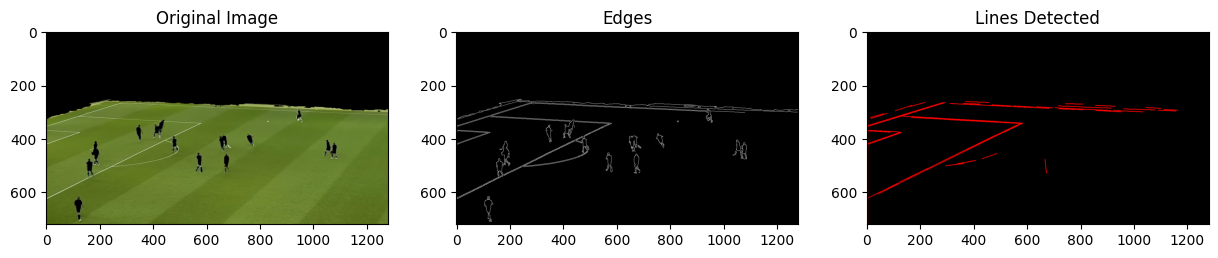

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = './assets/green_region.png'
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detector with adjusted parameters
edges = cv2.Canny(blurred, 50, 150, apertureSize=3)

# Use Probabilistic Hough Line Transform to detect lines
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=50, maxLineGap=10)

# Create a copy of the original image to draw lines
# line_image = np.copy(image)
line_image = np.zeros_like(image)

# Draw lines on the image in red color
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Red color

# Display the original image, edges, and the image with lines
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title('Edges')
plt.imshow(edges, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Lines Detected')
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))

plt.show()

# Saving the Line Image
# cv2.imwrite('./assets/lines_of_field.png', line_image)


In [16]:
# Function to merge parallel lines
def merge_parallel_lines(lines, angle_threshold=np.pi / 180, distance_threshold=10):
    merged_lines = []
    for line in lines:
        rho, theta = line[0]
        if not merged_lines:
            merged_lines.append([rho, theta])
        else:
            for merged_line in merged_lines:
                merged_rho, merged_theta = merged_line
                if abs(theta - merged_theta) < angle_threshold and abs(rho - merged_rho) < distance_threshold:
                    merged_line[0] = (merged_rho + rho) / 2
                    merged_line[1] = (merged_theta + theta) / 2
                    break
            else:
                merged_lines.append([rho, theta])
    return merged_lines

# Merge parallel lines
merged_lines = merge_parallel_lines(lines)

# Draw the merged lines on the image
result_image = image.copy()
for rho, theta in merged_lines:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(result_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


ValueError: too many values to unpack (expected 2)

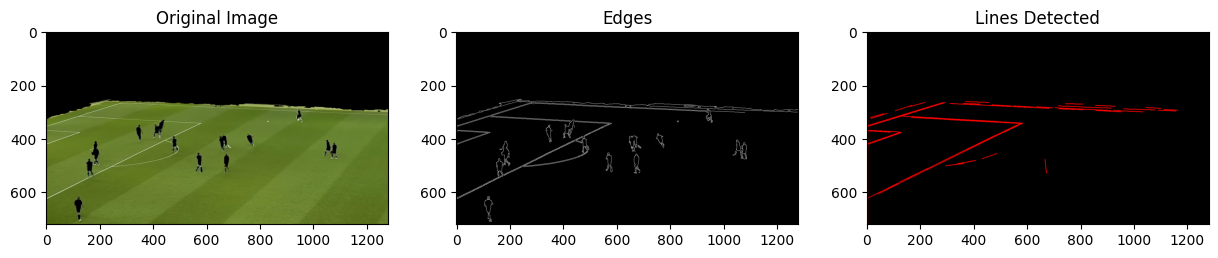

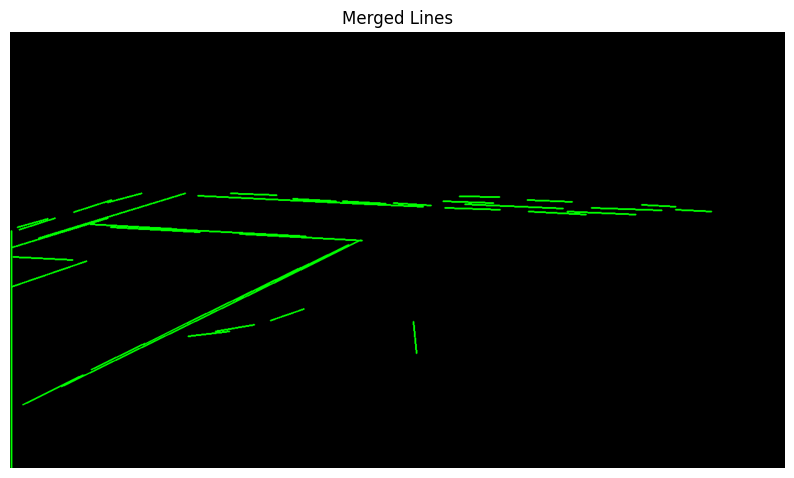

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = './assets/green_region.png'
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detector with adjusted parameters
edges = cv2.Canny(blurred, 50, 150, apertureSize=3)

# Use Probabilistic Hough Line Transform to detect lines
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=50, maxLineGap=10)

# Create a copy of the original image to draw lines
line_image = np.zeros_like(image)

# Draw lines on the image in red color
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Red color

# Display the original image, edges, and the image with lines
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title('Edges')
plt.imshow(edges, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Lines Detected')
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))

plt.show()

# Saving the Line Image
# cv2.imwrite('lines_of_field.png', line_image)

# Function to merge parallel lines
def merge_parallel_lines(lines, angle_threshold=np.pi / 180, distance_threshold=10):
    def compute_angle(line):
        x1, y1, x2, y2 = line
        return np.arctan2(y2 - y1, x2 - x1)

    merged_lines = []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        if not merged_lines:
            merged_lines.append([x1, y1, x2, y2])
        else:
            for merged_line in merged_lines:
                mx1, my1, mx2, my2 = merged_line
                angle1 = compute_angle((x1, y1, x2, y2))
                angle2 = compute_angle((mx1, my1, mx2, my2))
                if abs(angle1 - angle2) < angle_threshold:
                    if (abs(x1 - mx1) < distance_threshold and abs(y1 - my1) < distance_threshold) or \
                       (abs(x2 - mx2) < distance_threshold and abs(y2 - my2) < distance_threshold):
                        merged_line[0] = (x1 + mx1) // 2
                        merged_line[1] = (y1 + my1) // 2
                        merged_line[2] = (x2 + mx2) // 2
                        merged_line[3] = (y2 + my2) // 2
                        break
            else:
                merged_lines.append([x1, y1, x2, y2])
    return merged_lines

# Merge parallel lines
if lines is not None:
    merged_lines = merge_parallel_lines(lines)

    # Draw the merged lines on the image
    # result_image = image.copy()
    result_image = np.zeros_like(image)
    for line in merged_lines:
        x1, y1, x2, y2 = line
        cv2.line(result_image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green color

    # Display the result
    plt.figure(figsize=(10, 10))
    plt.title('Merged Lines')
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
else:
    print("No lines were detected.")

# Saving the Merged Line Image
cv2.imwrite('./assets/merged_lines_of_field.png', result_image)
